In [1]:
import pandas as pd

# "wikitemps.csv" is available only on canvas
df = pd.read_csv('wikitemps.csv')
df

,City,Mean High Jan,Mean High Feb,Mean High Mar,Mean High Apr,Mean High May,Mean High Jun,Mean High Jul,Mean High Aug,Mean High Sep,...,Mean Low Apr,Mean Low May,Mean Low Jun,Mean Low Jul,Mean Low Aug,Mean Low Sep,Mean Low Oct,Mean Low Nov,Mean Low Dec,Average
0,San Francisco,19.6,22.5,24.3,27.9,28.2,30.0,28.4,29.7,32.0,...,7.3,8.7,10.1,10.8,11.4,11.1,9.8,6.8,4.5,17.3
1,Sacramento,17.8,21.4,24.9,30.7,35.4,39.1,40.6,39.8,37.8,...,3.3,6.1,9.3,11.7,11.7,9.6,5.4,0.3,-1.9,17.4
2,Manchester,7.3,7.6,10.0,12.6,16.1,18.6,20.6,20.3,17.6,...,4.9,7.7,10.5,12.6,12.4,10.3,7.4,4.2,1.8,10.0
3,Paris,7.2,8.3,12.2,15.6,19.6,22.7,25.2,25.0,21.1,...,7.3,10.9,13.8,15.8,15.7,12.7,9.6,5.8,3.4,12.4
4,Port-of-Spain,28.0,28.9,30.3,31.0,33.1,31.5,31.3,31.7,32.2,...,22.0,23.0,23.3,23.0,23.0,23.1,22.6,22.3,21.0,26.4
5,Sydney,27.0,26.8,25.7,23.6,20.9,18.2,17.9,19.3,21.6,...,15.3,12.3,10.0,8.9,9.7,12.3,14.6,16.6,18.4,18.8
6,Johannesburg,30.2,29.1,28.0,25.5,23.0,20.4,21.1,24.4,28.4,...,10.3,7.2,4.1,4.1,6.2,9.3,11.2,12.7,13.9,18.3
7,Minneapolis,6.2,8.5,18.8,26.7,31.1,34.1,34.9,33.6,31.1,...,-5.8,1.6,7.2,11.8,10.4,2.4,-3.7,-13.6,23.3,10.2
8,Los Angeles,20.1,20.3,21.2,22.6,23.6,25.6,28.4,29.1,28.4,...,11.9,13.9,15.7,17.6,17.8,17.3,14.8,11.1,8.6,18.6
9,Miami,24.7,25.6,26.8,28.4,30.6,31.9,32.7,32.8,31.8,...,20.2,22.7,24.4,25.2,25.2,24.7,23.1,20.1,17.2,25.1


In [2]:
from sklearn.preprocessing import StandardScaler

# Normalise the data before use
x = StandardScaler().fit_transform(df.iloc[:,1:])

In [4]:
import numpy as np

# Check the normalisation -- not necessary... for demo only
np.mean(x) # Expect this to be ~ 0.0

6.705747068735945e-17

In [5]:
np.std(x) # Expect this to be ~ 1.0

1.0

In [6]:
from sklearn.decomposition import PCA

# We're using this to create a 2D chart, so we need 2 PCs
pca = PCA(n_components=2)
pca.fit(x)
pca_x = pca.transform(x)

In [7]:
pca_x

array([[-0.1602383 ,  1.22339976],
       [-0.67061755,  4.48481021],
       [-4.6487662 , -3.61441449],
       [-3.26120448, -2.37746261],
       [ 6.06777934,  0.71369456],
       [ 1.33880049, -3.22911491],
       [ 0.85564559, -1.0974646 ],
       [-5.57112257,  4.02942506],
       [ 0.89002171, -0.63548422],
       [ 5.15970197,  0.50261124]])

In [8]:
pca.explained_variance_ratio_ # How much variance is explained?

array([0.52206567, 0.27744099])

In [23]:
import matplotlib.pyplot as plt

# Function to draw the points in 2D -- with some post-recording additions
def plot_with_labels(coords, labels):
    plt.figure(figsize=(20, 12))
    plt.rc('axes', labelsize=18)  # The tiny fonts hurt my eyes!
    plt.rc('axes', titlesize=22)
    plt.rc('font', size=16)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Principal Components of 10 Cities by High & Low Temps')
    
    # Draw and label each point
    for i, label in enumerate(labels):
        x, y = coords[i]
        plt.scatter(x, y)
        plt.annotate(label,
                    xy = (x, y),
                    xytext = (5, 2), # Move the text a little
                    textcoords = 'offset points', # Where to move the text?
                    ha = 'center',
                    va = 'bottom')
    plt.show()

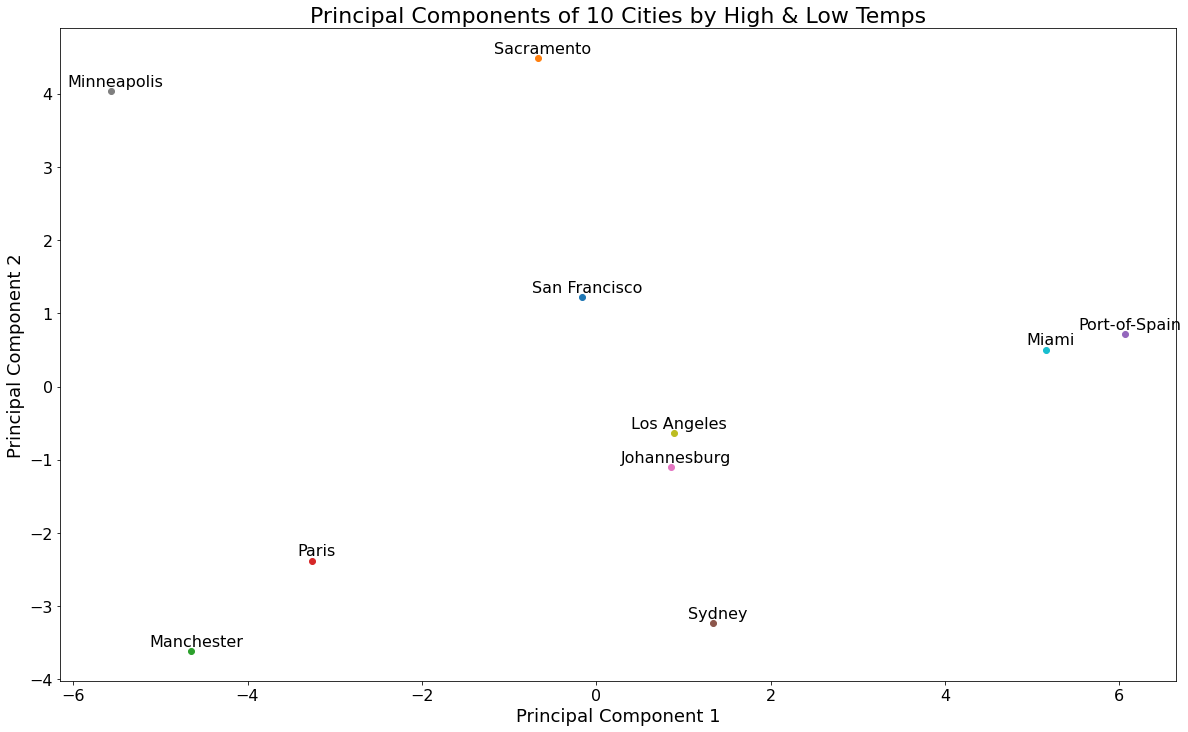

In [24]:
plot_with_labels(pca_x, df.iloc[:,0])